1 Подготовка данных

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Прочитаем два csv файла используя команды "read_csv"

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

Покажем столбцы прочитанных csv файлов

In [ ]:
print('Столбцы train', train.columns.to_list())
print('Столбцы test', test.columns.to_list())

Столбцы train ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
Столбцы test ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


Можно заметить , что у файла test отсутсвует столбец 'survived', поэтому создадим его со значением Nan. А также создадим общую колонку 'PassengerId' , по которому мы будем дальше объединять.  

In [ ]:
test['survived']=np.nan
train['PassengerId']=range(1,len(train)+1)
test['PassengerId']=range(len(train)+1,len(train)+len(test)+1)
df=pd.concat([train,test],axis=0,ignore_index=True)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,PassengerId
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5


Преобразуем столбцы в категориальные признаки

In [ ]:
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df['survived']=df['survived'].astype('category')
print(df.dtypes)

survived       category
pclass         category
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked       category
PassengerId       int64
dtype: object


2 Анализ таблицы

Покажем базовую статистику таблицы. Потом проанализируем и найдем , в каком классе больше всего пассажиров

In [ ]:
print('Базовая статистика')
print(df.describe())

Базовая статистика
               age        sibsp        parch         fare  PassengerId
count  1046.000000  1309.000000  1309.000000  1308.000000  1309.000000
mean     29.881138     0.498854     0.385027    33.295479   655.000000
std      14.413493     1.041658     0.865560    51.758668   378.020061
min       0.170000     0.000000     0.000000     0.000000     1.000000
25%      21.000000     0.000000     0.000000     7.895800   328.000000
50%      28.000000     0.000000     0.000000    14.454200   655.000000
75%      39.000000     1.000000     0.000000    31.275000   982.000000
max      80.000000     8.000000     9.000000   512.329200  1309.000000


In [ ]:
class_count=df['pclass'].value_counts()
print(f"\nБольше всего пассажиров в классе {class_count.idxmax()} - {class_count.max()} человек")


Больше всего пассажиров в классе 3 - 709 человек


Построим график "Bar chat" , чтобы наглядно все продемонстрировать.

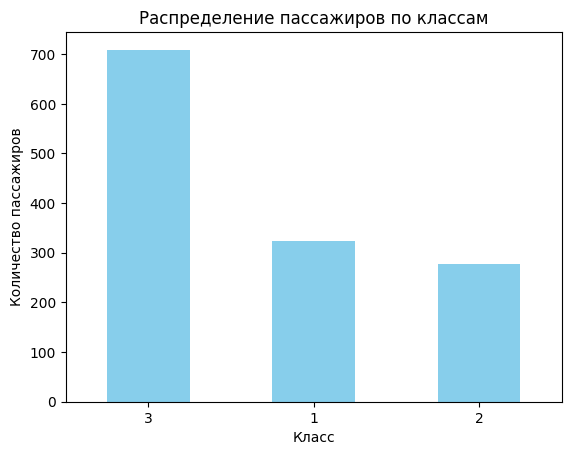

In [ ]:
class_count.plot(kind='bar', color='skyblue')
plt.title('Распределение пассажиров по классам')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.show()

Таким образом , в классе 3 самое большое количество человек.

Найдем самый юный возраст и самый взрослый возраст. А также понять насколько значения отличаются.

In [ ]:
age_group=df.groupby(['pclass','sex'],observed=True)['age'].mean().unstack()
print(age_group)

youngest=age_group.min().min()
oldest=age_group.max().max()
difference= oldest - youngest

print(f"Самый юный возраст: {youngest:.2f}")
print(f"Самый взрослый возраст: {oldest:.2f}")
print(f"Разница между самым взрослым и самым юным равна: {difference:.2f}")

sex        female       male
pclass                      
1       37.037594  41.029272
2       27.499223  30.815380
3       22.185329  25.962264
Самый юный возраст: 22.19
Самый взрослый возраст: 41.03
Разница между самым взрослым и самым юным равна: 18.84


Построим график "Box chart" , чтобы более наглядно показать разброс возраста.

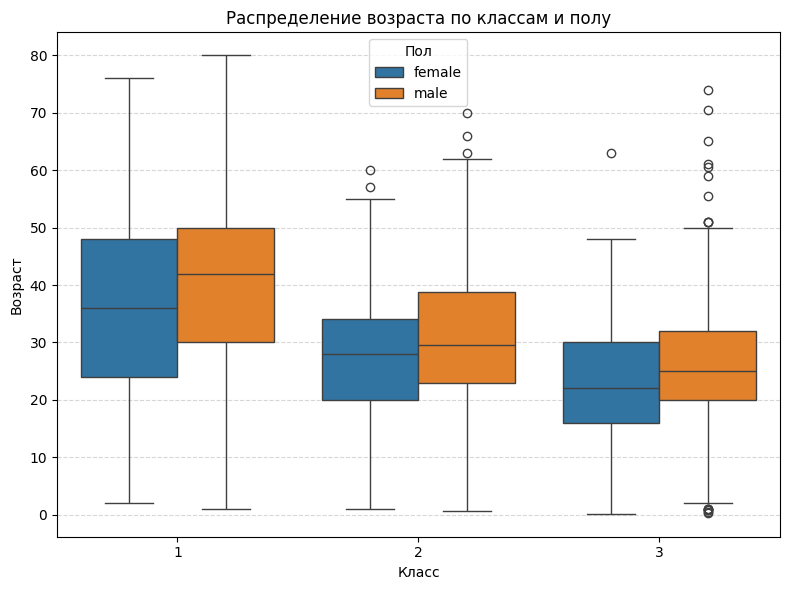

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='pclass', y='age', hue='sex')
plt.title('Распределение возраста по классам и полу')
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.legend(title='Пол')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

На основе анализа данных и графика можно сделать вывод , что самый юный средний возраст преобладает среди женщин 3-го класса примерно 22.19 лет. Самый взролслый средний возраст преобладает среди мужчин 1-го класса,примерно 41.03 лет . Разница между самый взрослым средним и самым юным средним составляет 18.84 года.

Отберем всех людей, фамилия , которых начинается на 'K'. А после необходимо отсортировать их, чтобы потом понять кто заплатил больше , а кто меньше.

In [ ]:
df['last_name']=df['name'].apply(lambda x: x.split(',')[0])
survived_k=df[(df['survived']==1) & (df['last_name'].str.startswith('K'))]
survived_k_sorted=survived_k.sort_values(by='fare',ascending=False)
most_expensive=survived_k_sorted.iloc[0]
cheapest=survived_k_sorted.iloc[-1]
print(f"Самый дорогой билет: {most_expensive['name']} - {most_expensive['fare']:.2f}")
print(f"Самый дешевый билет: {cheapest['name']} - {cheapest['fare']:.2f}")

Самый дорогой билет: Kimball, Mr. Edwin Nelson Jr - 52.55
Самый дешевый билет: Kelly, Miss. Mary - 7.75


Построим график "Horizontal bar chat", чтобы показать у каких пассажиров с фамилией , начинающейся на "К", самый дорогой и дешевый билет.

In [ ]:
fig = px.bar(
    survived_k_sorted,
    x='fare',
    y='last_name',
    orientation='h',
    title='Стоимость билетов у выживших пассажиров с фамилией на "K"',
    labels={'fare': 'Стоимость билета', 'last_name': 'Фамилия'},
    color='fare',
    color_continuous_scale='Blues',
    hover_data=['name', 'age', 'pclass', 'sex']
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    template='plotly_white'
)

fig.show()

Среди них , больше всего заплатил Kimball, а меньше всего Kelly

Определим среди выживших пассажиров количество родных , которые были на корабле

In [ ]:
df['relatives']=df['sibsp']+df['parch']
max_relatives=df[df['survived']==1]['relatives'].max()
print(f"Максимальное количество родственников у выживших пассажиров: {max_relatives}")

Максимальное количество родственников у выживших пассажиров: 6


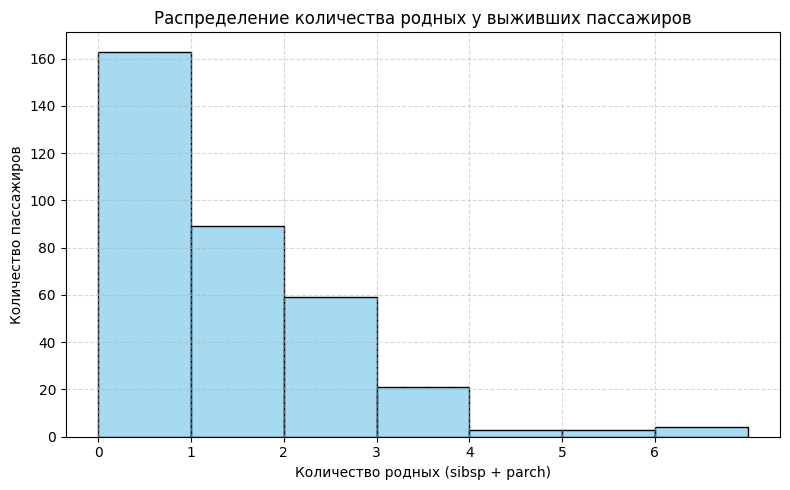

In [ ]:
survived=df[df['survived']==1]

plt.figure(figsize=(8, 5))
sns.histplot(survived['relatives'], bins=range(0, survived['relatives'].max()+2), kde=False, color='skyblue', edgecolor='black')

plt.title('Распределение количества родных у выживших пассажиров')
plt.xlabel('Количество родных (sibsp + parch)')
plt.ylabel('Количество пассажиров')
plt.xticks(range(0, survived['relatives'].max()+1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Можно сделать вывод , что очень маленький процент пассажиров находилсь на борту с количеством родственниками больше 4. В основном люди путешествуют самостоятельно, либо с 1-м или 2-мя родственниками.

Теперь посчитаем среднюю стоимость билета пассажиров, для которых указана каюта и для которых не указана, а также посчитаем во сколько они отличаются.

In [ ]:
with_cabin=df[df['cabin'].notna()]
without_cabin=df[df['cabin'].isna()]
avg_fare_with_cabin=with_cabin['fare'].mean()
avg_fare_without_cabin=without_cabin['fare'].mean()
fare_differences=avg_fare_with_cabin/avg_fare_without_cabin
print(f"Средняя стоимость билета с каютой: {avg_fare_with_cabin:.2f}")
print(f"Средняя стоимость билета без каюты: {avg_fare_without_cabin:.2f}")
print(f"Разница в стоимости: {fare_differences:.2f} раз")

Средняя стоимость билета с каютой: 81.93
Средняя стоимость билета без каюты: 19.13
Разница в стоимости: 4.28 раз


Таким образом  пассажиры с каютой платили в 4 раза больше за билеты, что, вероятно, связано с более комфортными условиями на борту и более высокими классами обслуживания.

3 Визуализация

Scatter plot - этот график отображает взаимосвязь между возрастом пассажиров и стоимостью их билетов. Каждая точка на графике представляет одного пассажира.

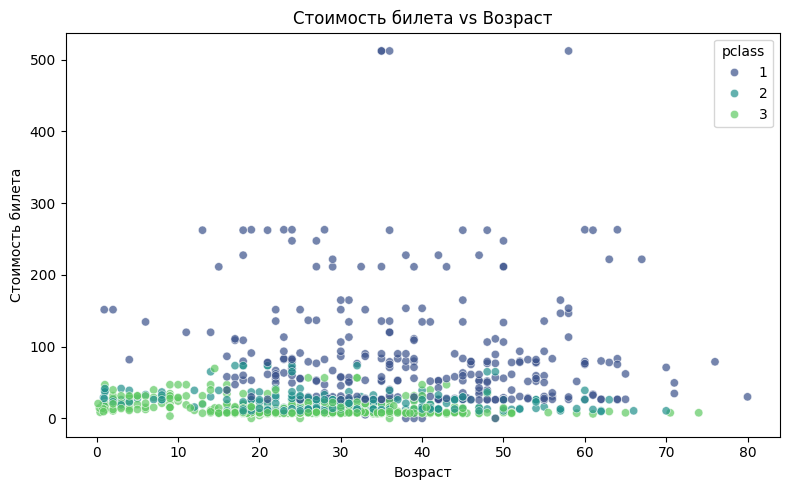

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', data=df, hue='pclass', palette='viridis', alpha=0.7)
plt.title('Стоимость билета vs Возраст')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.tight_layout()
plt.show()


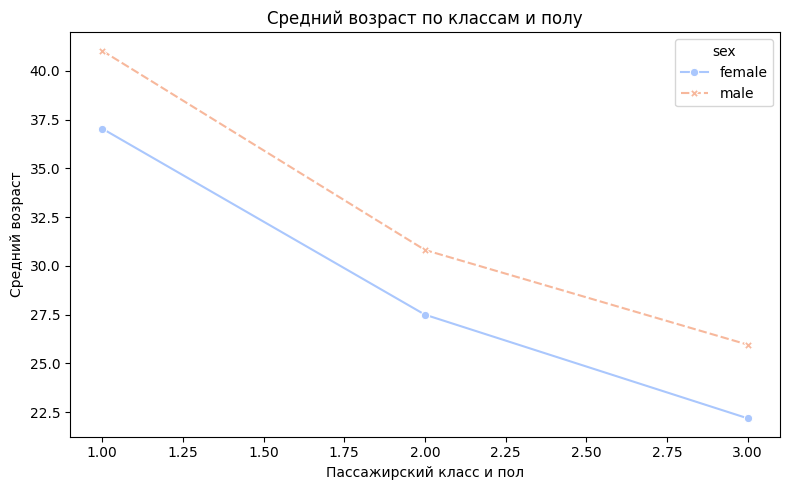

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=age_group, palette='coolwarm', markers=True)
plt.title('Средний возраст по классам и полу')
plt.ylabel('Средний возраст')
plt.xlabel('Пассажирский класс и пол')
plt.tight_layout()
plt.show()

Pie Chart - эта круговая диаграмма визуализирует пропорцию выживших и погибших пассажиров.

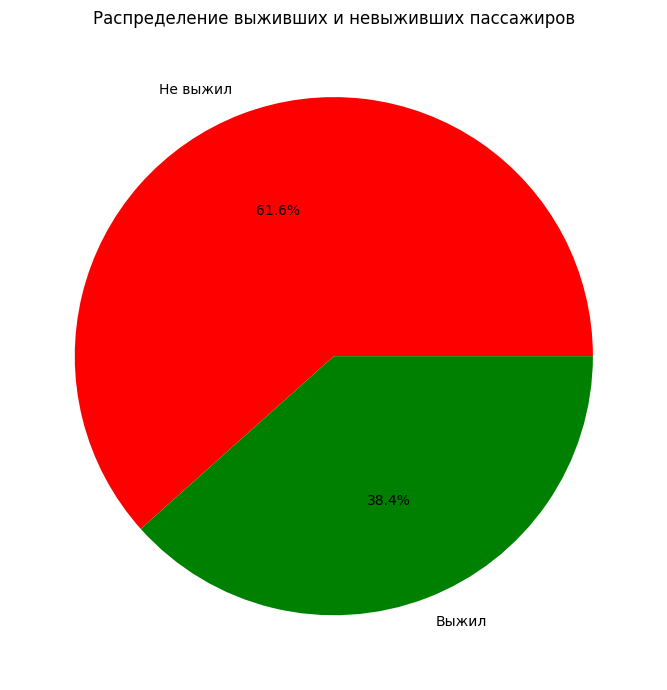

In [ ]:
survival_counts = df['survived'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(survival_counts, labels=['Не выжил', 'Выжил'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Распределение выживших и невыживших пассажиров')
plt.tight_layout()
plt.show()

Sunburst Chart - представляет иерархию классов и пола, позволяя наглядно увидеть распределение пассажиров.

In [ ]:
fig = px.sunburst(df, path=['pclass', 'sex'], title='Распределение пассажиров по классу и полу')
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



3D Scatter Plot - позволяет изучить распределение пассажиров по возрасту, стоимости билета и классу.

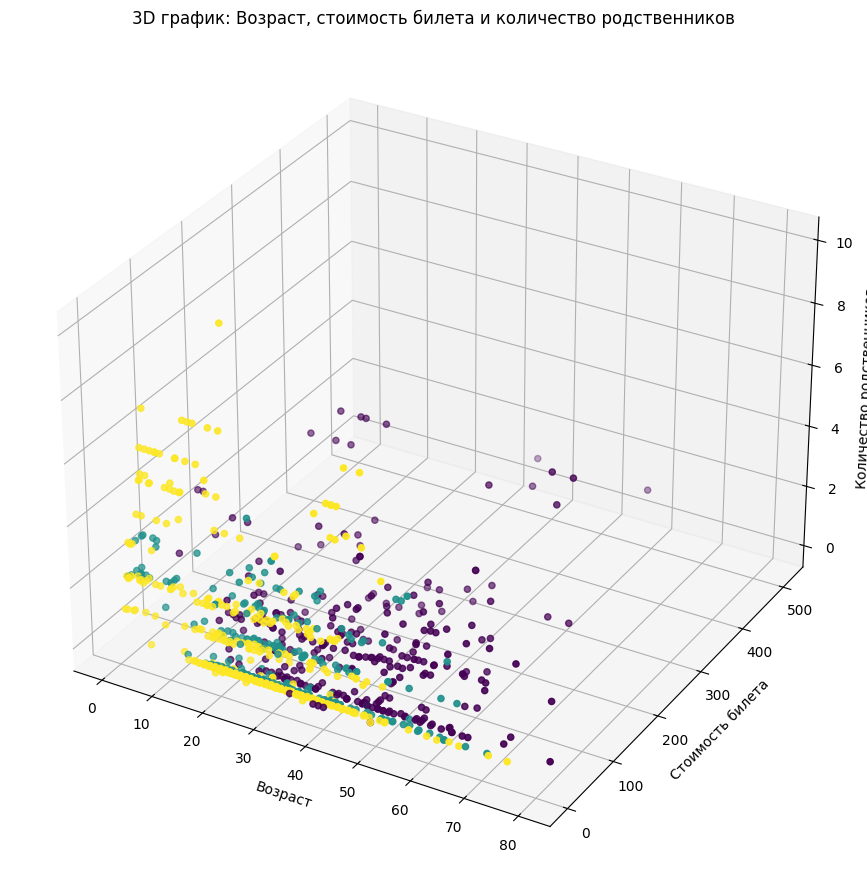

In [ ]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['fare'], df['relatives'], c=df['pclass'], cmap='viridis')
ax.set_xlabel('Возраст')
ax.set_ylabel('Стоимость билета')
ax.set_zlabel('Количество родственников')
plt.title('3D график: Возраст, стоимость билета и количество родственников')
plt.tight_layout()
plt.show()

Sankey Diagram - диаграмма визуализирует, сколько людей из каждого класса выжили и сколько погибли.

In [ ]:
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=['1-й класс', '2-й класс', '3-й класс', 'Выжил', 'Не выжил']
    ),
    link=dict(
        source=[0, 1, 2, 0, 1, 2],  # Индексы источников
        target=[3, 3, 3, 4, 4, 4],  # Индексы целей
        value=[200, 150, 50, 100, 200, 50]  # Значения переходов
    )
))

fig.update_layout(title_text="Sankey Diagram: Переходы между классами и выживаемостью")
fig.show()